In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def filtering(image, mask):
    #Zero padding
    shift_row = mask.shape[0]//2
    shift_col = mask.shape[1]//2
    
    new_image = np.zeros((image.shape[0] + 2*shift_row, image.shape[1] + 2*shift_col), 
                         np.float32)
    new_image[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col] = image
    
    #Resulting image
    new_image2 = np.zeros((new_image.shape[0], new_image.shape[1]), np.float32)
    
    #Perform filtering
    for i in range(shift_row, image.shape[0]+shift_row):
        for j in range(shift_col, image.shape[1]+shift_col):
            aux = new_image[i-shift_row:i+shift_row+1, j-shift_col:j+shift_col+1]
            new_image2[i,j] = np.sum(aux*mask)
            
    return new_image2[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]
    
    

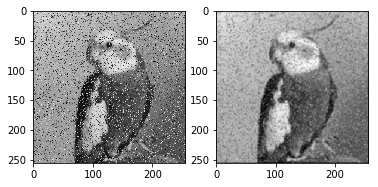

In [2]:
im = cv2.imread('lorito.jpg', 0)
mask = (1/9)*np.ones((3,3))

im2 = filtering(im, mask)

plt.figure()
plt.subplot(1,2,1), plt.imshow(im, cmap='gray')
plt.subplot(1,2,2), plt.imshow(im2, cmap='gray')
plt.show()

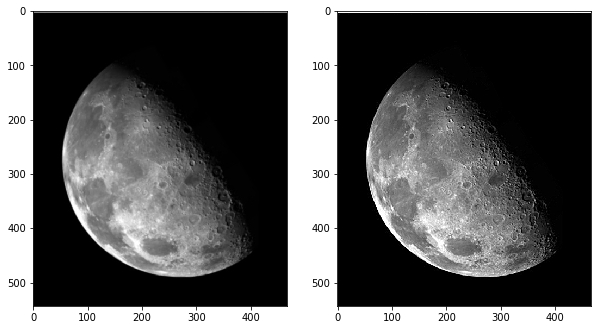

In [13]:
#Laplacian
im = cv2.imread('moon.jpg', 0)
mask = np.array([[0,1,0],[1, -4, 1],[0, 1, 0]])

laplacian = filtering(im, mask)
out = im - laplacian

np.clip(out, 0, 255, out = out)
out = out.astype('uint8')



plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(im, cmap='gray')
plt.subplot(1,2,2), plt.imshow(out, cmap='gray')
plt.show()
